In [80]:
import networkx as nx
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from pyvis import network as net

In [81]:
H = nx.read_gml("C:\\Users\\s1z2y\\Desktop\\POLIBUDA_2_SEM\\Comploex_systems\\lista2\\lesmis.gml")
h= net.Network(H, height:="1000px",bgcolor='#222222', font_color='white', notebook=True)
h.from_nx(H)
h.show("C:\\Users\\s1z2y\\Desktop\\POLIBUDA_2_SEM\\Comploex_systems\\lista2\\lesmis1.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


Zad2

In [84]:
def average_degree(G):
    return np.mean([d for _ , d in G.degree()])
    
def hist(G):
    de_hist = nx.degree_histogram(G)
    len_dis=len(de_hist)
    dis_x = [*range(len_dis)]
    dis_y=[d/G.number_of_nodes() for d in de_hist]
    return dis_x, dis_y


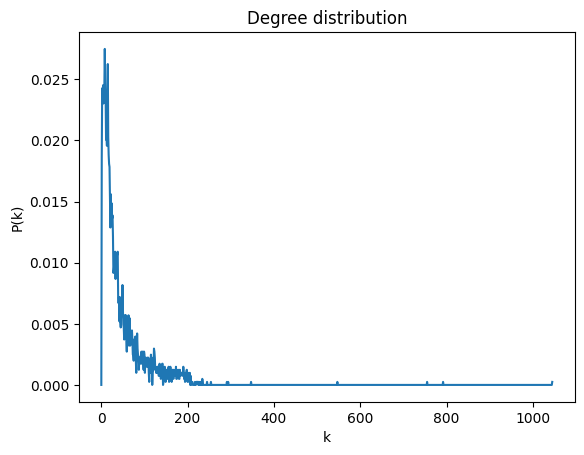

In [86]:
facebook = pd.read_csv("facebook_combined.txt", sep=" ", names=["start", "end"])
G = nx.from_pandas_edgelist(facebook, "start", "end")
hist_plot=hist(G)
plt.plot(hist_plot[0], hist_plot[1])
plt.title("Degree distribution")
plt.xlabel("k")
plt.ylabel("P(k)")
plt.show()


Average clustering coefficient= 0.6055467186200876


Text(0, 0.5, 'Count')

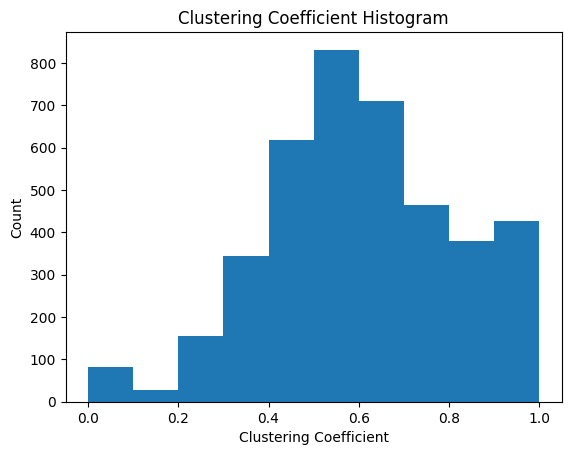

In [5]:
print("Average clustering coefficient=",nx.average_clustering(G))
plt.hist(nx.clustering(G).values(), bins=10)
plt.title("Clustering Coefficient Histogram")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Count")

Diameter = 8
Average path length= 3.691592636562027


Text(0.5, 1.0, 'shortest path length')

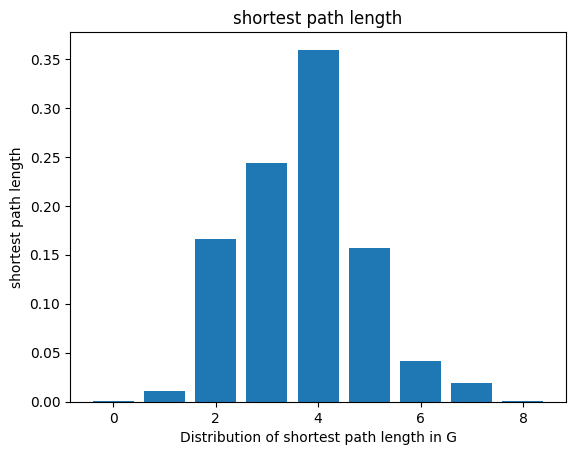

In [90]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))
average_path_lengths = [np.mean([*spl.values()]) for spl in shortest_path_lengths.values()]
diameter =  nx.diameter(G)

print("Diameter =",diameter )
print( "Average path length=", np.mean(average_path_lengths))

counter = np.zeros(diameter + 1)
for fsl in shortest_path_lengths.values():
    len_path, cont = np.unique([*fsl.values()], return_counts=True)
    counter[len_path] += cont

# Express frequency distribution as a percentage (ignoring path lengths of 0)
freq_percent = counter / counter.sum()

# Plot the frequency distribution (ignoring path lengths of 0) as a percentage

plt.bar([*range(diameter + 1)], height=freq_percent)
plt.xlabel("Distribution of shortest path length in G")
plt.ylabel("shortest path length")
plt.title("shortest path length")

zad3

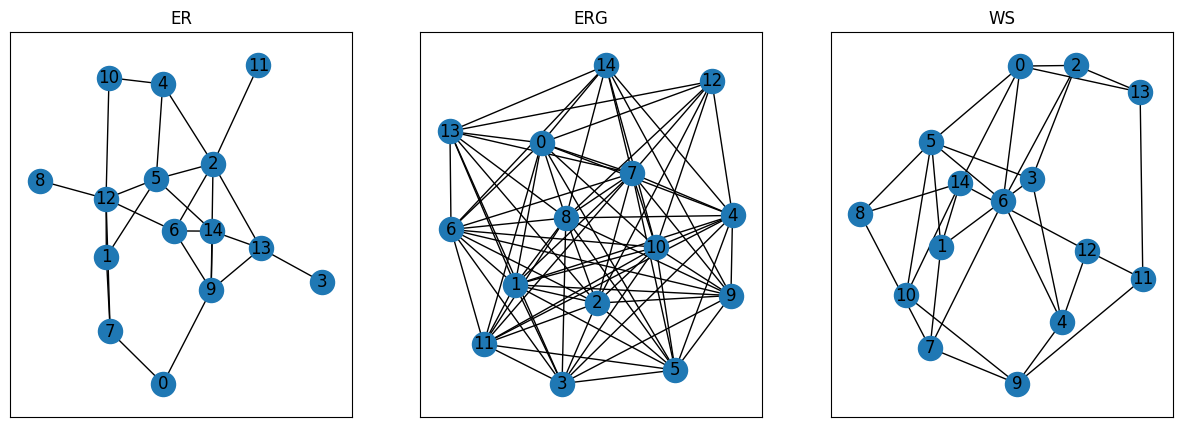

In [191]:
N = 15
L = 25
p = 0.7
k=4
b=0.3
ER = nx.gnm_random_graph(N, L)
ERG = nx.erdos_renyi_graph(N, p)
WS = nx.watts_strogatz_graph(N,k,b)

graphs = [ER, ERG, WS]
title = ['ER', 'ERG','WS']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax = axes.flatten()

for i in range(3):
    nx.draw_networkx(graphs[i], ax=ax[i])
    ax[i].set_title(title[i])

plt.show()

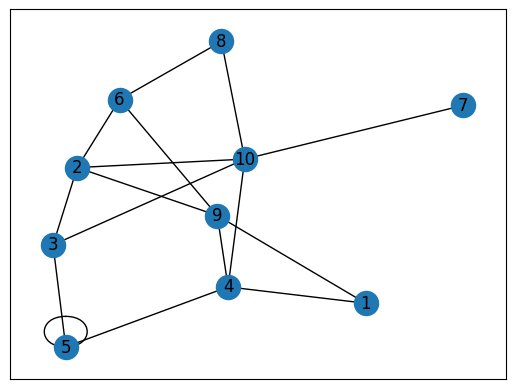

In [192]:
def erdos_renyi(N, L):
	g = nx.Graph()
	g.add_nodes_from(range(1, N))
	for _ in range(L):
		g.add_edge(random.randint(1,N), random.randint(1,N))
	return g
G=erdos_renyi(10,20)
nx.draw_networkx(G)

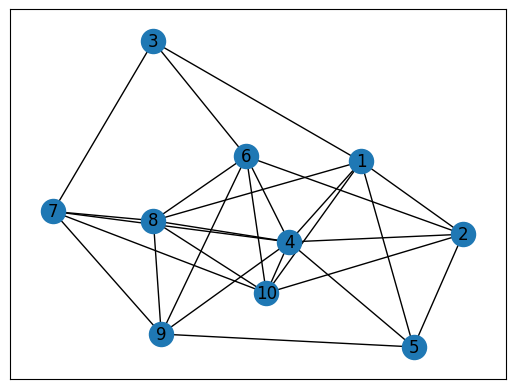

In [193]:
def erdos_renyi_gilbert(N, p):
	# Create an empty graph object
	g = nx.Graph()

	# Start with N isolated nodes
	g.add_nodes_from(range(1, N + 1))

	# Select a node pair and generate r ~ U(0, 1).
	for i in g.nodes():
		for j in g.nodes():
			if i < j:
				if p < random.random():
					# If p < r then connect the selected pair, 
					# otherwise leave them disconnected
					g.add_edge(i, j)
		pos = nx.shell_layout(g)

	return g
G=erdos_renyi_gilbert(10,0.4)
nx.draw_networkx(G)

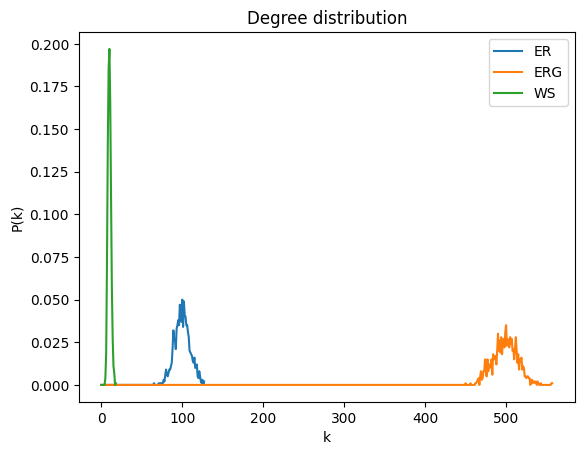

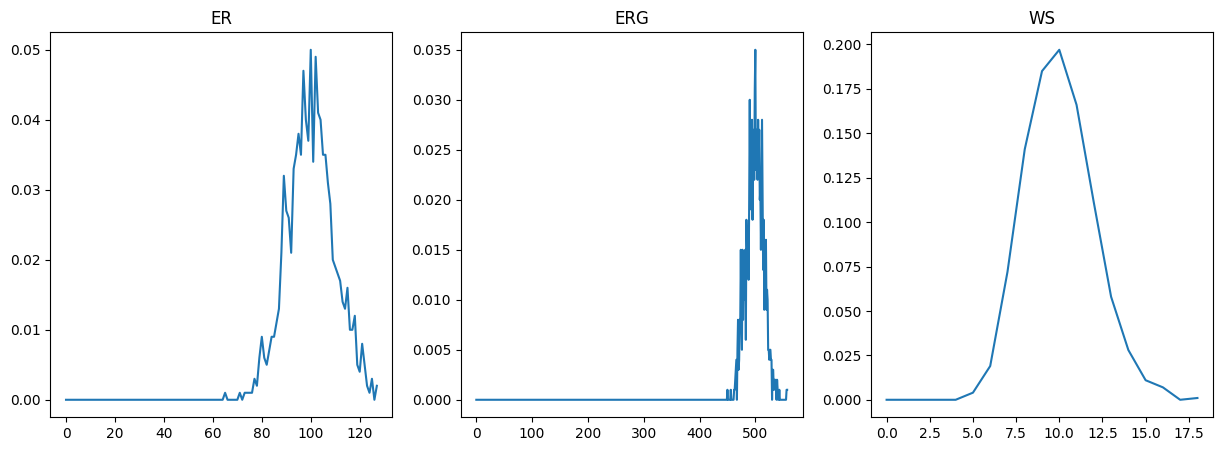

In [120]:
N=1000
L=50000
p=0.5
k=10
b=0.5
ER = nx.gnm_random_graph(N, L)
ERG = nx.erdos_renyi_graph(N, p)
WS = nx.watts_strogatz_graph(N,k,b)

hist_ER=hist(ER)
hist_ERG=hist(ERG)
hist_WS=hist(WS)
plt.plot(hist_ER[0], hist_ER[1], label="ER")
plt.plot(hist_ERG[0], hist_ERG[1], label="ERG")
plt.plot(hist_WS[0], hist_WS[1], label="WS")
plt.title('Degree distribution')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.legend()
plt.show()


graphs = [hist_ER, hist_ERG, hist_WS]
title = ['ER', 'ERG','WS']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax = axes.flatten()

for i in range(3):
    ax[i].plot(graphs[i][0],graphs[i][1], label="ER")
    ax[i].set_title(title[i])

plt.show()



In [115]:
print("Average degree k for ER=", average_degree(ER))
print("Average degree k for ERG=", average_degree(ERG))
print("Average degree k for WS=", average_degree(WS))

Average degree k for ER= 20.0
Average degree k for ERG= 499.296
Average degree k for WS= 10.0


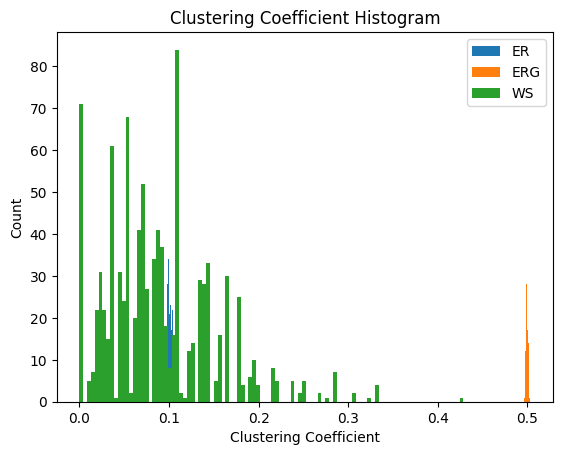

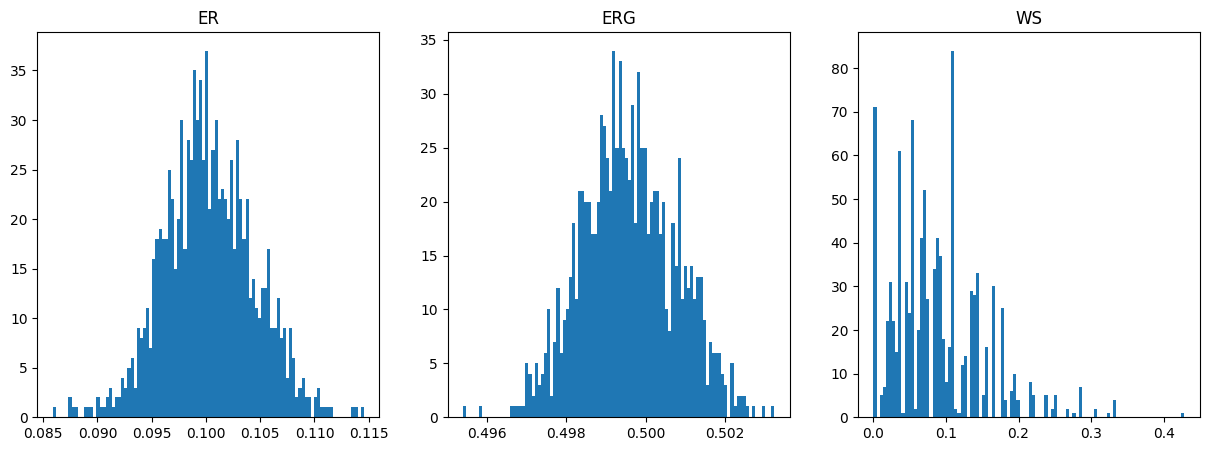

Average clustering coefficient ER= 0.10026743979960555
Average clustering coefficient ERG= 0.49957651430332006
Average clustering coefficient WS= 0.0886919185389778


In [122]:
plt.hist(nx.clustering(ER).values(), bins=100, label="ER")
plt.hist(nx.clustering(ERG).values(), bins=100, label="ERG")
plt.hist(nx.clustering(WS).values(), bins=100, label="WS")
plt.title("Clustering Coefficient Histogram")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Count")
plt.legend()
plt.show()

graphs = [ER, ERG,WS]
title = ['ER', 'ERG','WS']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax = axes.flatten()

for i in range(3):
    ax[i].hist(nx.clustering(graphs[i]).values(), bins=100, label=title[i])
    ax[i].set_title(title[i])

plt.show()

print("Average clustering coefficient ER=", nx.average_clustering(ER))
print("Average clustering coefficient ERG=", nx.average_clustering(ERG))
print("Average clustering coefficient WS=",nx.average_clustering(WS))

ER Diameter = 3
ER Average path length= 1.898042
ERG Diameter = 2
ERG Average path length= 1.498826
WS Diameter = 5
WS Average path length= 3.3734539999999997


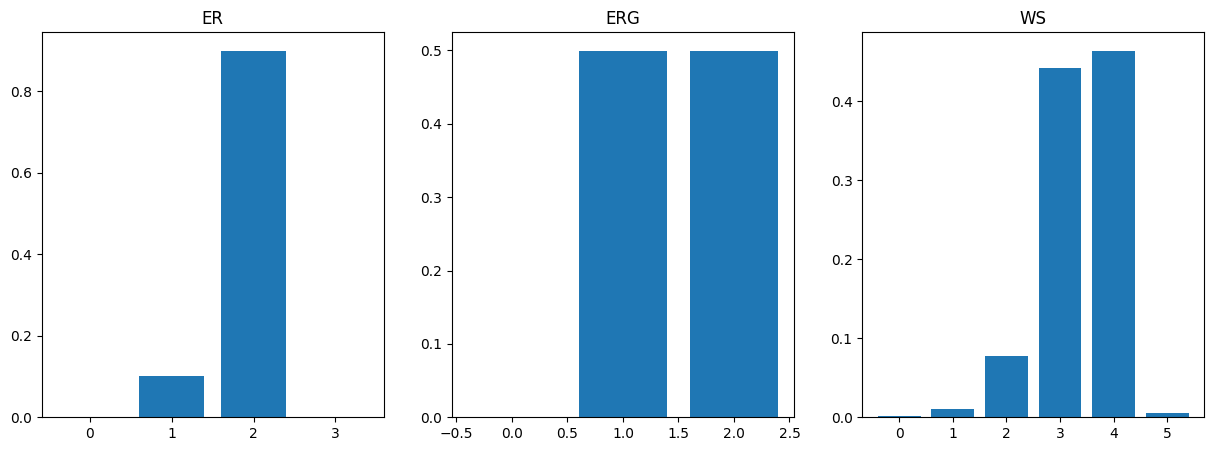

In [136]:
shortest_path_lengths_ER = dict(nx.all_pairs_shortest_path_length(ER))
average_path_lengths_ER = np.mean([np.mean([*spl.values()]) for spl in shortest_path_lengths_ER.values()])
ER_d=nx.diameter(ER)

print("ER Diameter =",ER_d )
print( "ER Average path length=", average_path_lengths_ER)

shortest_path_lengths_ERG = dict(nx.all_pairs_shortest_path_length(ERG))
average_path_lengths_ERG = np.mean([np.mean([*spl.values()]) for spl in shortest_path_lengths_ERG.values()])
ERG_d=nx.diameter(ERG)

print("ERG Diameter =", ERG_d)
print( "ERG Average path length=",average_path_lengths_ERG )

shortest_path_lengths_WS = dict(nx.all_pairs_shortest_path_length(WS))
average_path_lengths_WS = np.mean([np.mean([*spl.values()]) for spl in shortest_path_lengths_WS.values()])
WS_d=nx.diameter(WS)

print("WS Diameter =", WS_d)
print( "WS Average path length=",average_path_lengths_WS )
diameter1=[ER_d+1,ERG_d+1,WS_d+1]
freq_percent1=[]
counter = np.zeros(ER_d + 1)
for fsl in shortest_path_lengths_ER.values():
    len_path, cont = np.unique([*fsl.values()], return_counts=True)
    counter[len_path] += cont


freq_percent = counter / counter.sum()
freq_percent1.append(freq_percent)

counter = np.zeros(ERG_d + 1)
for fsl in shortest_path_lengths_ERG.values():
    len_path, cont = np.unique([*fsl.values()], return_counts=True)
    counter[len_path] += cont


freq_percent = counter / counter.sum()
freq_percent1.append(freq_percent)

counter = np.zeros(WS_d + 1)
for fsl in shortest_path_lengths_WS.values():
    len_path, cont = np.unique([*fsl.values()], return_counts=True)
    counter[len_path] += cont


freq_percent = counter / counter.sum()
freq_percent1.append(freq_percent)
print


title = ['ER', 'ERG','WS']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax = axes.flatten()

for i in range(3):
    ax[i].bar([*range(diameter1[i])], height=freq_percent1[i])

    ax[i].set_title(title[i])

plt.show()
